## Script Plot Tiltmeter G.Anak Krakatau stasiun Lava 93

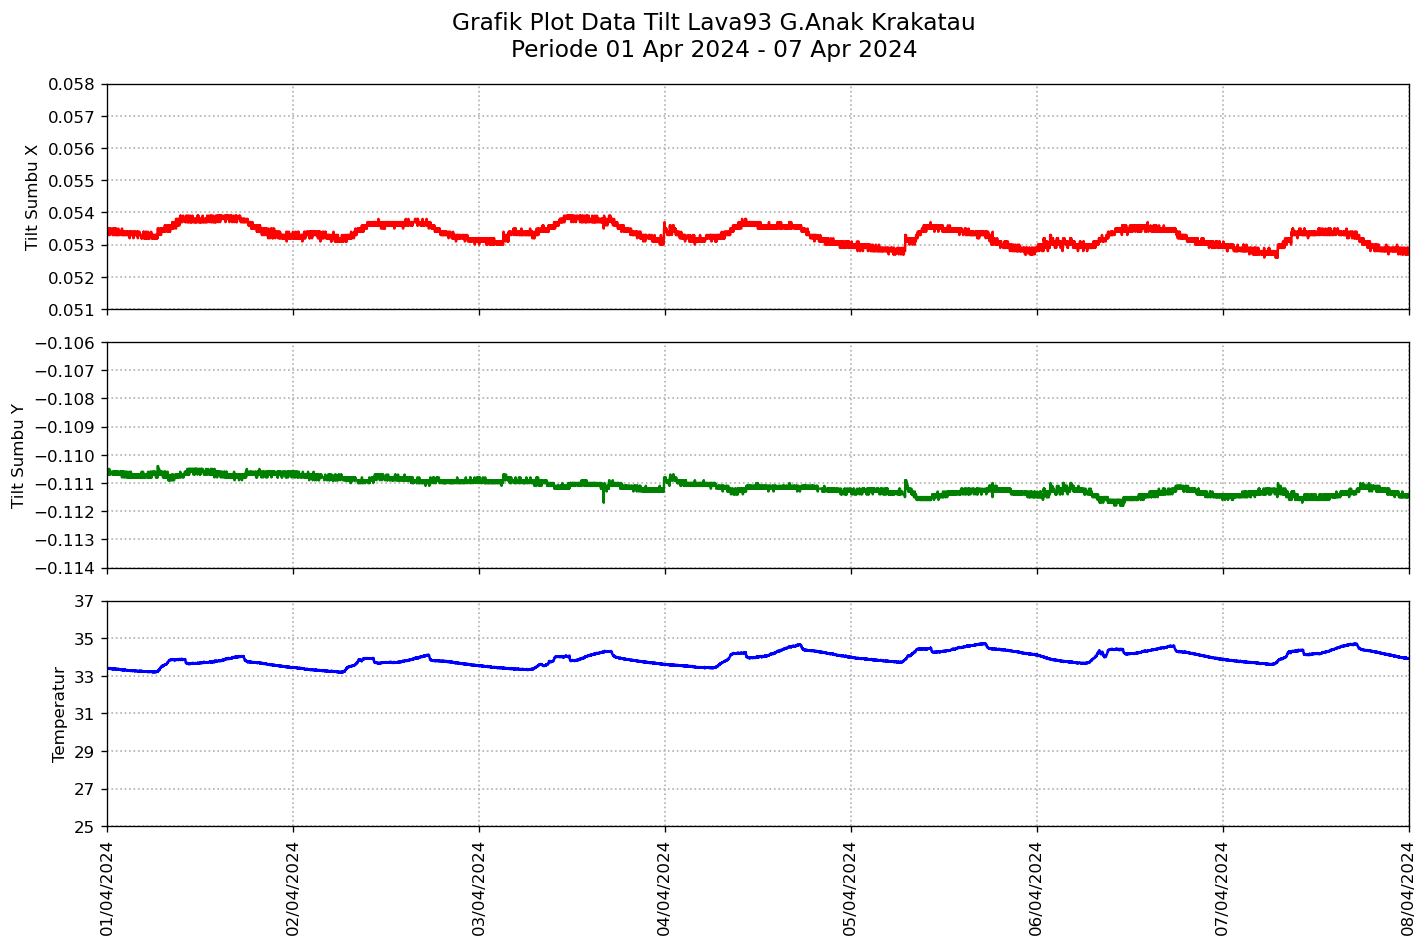

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

waktu_awal = '01/04/2024'
waktu_akhir = '07/04/2024'
interval_hari = 1

nama_file = r'\\192.189.23.214\d\Data Tilt Lava\202404_Lava93.txt'

# nama_file = 'TiltKras.txt' #jika diupload langsung
# nama_file = '/content/drive/MyDrive/data/Kenzen_est_2023.csv' #jika dari google drive
stasiun = 'Lava93'
gunung = 'Anak Krakatau'

# Fungsi untuk membaca file csv dan menggabungkan kolom tanggal dan waktu, tidak ada yang perlu diubah
def read_data(filename):
    df = pd.read_csv(filename, sep=',', header=None, names=['DateTime', 'Tilt X', 'Tilt Y', 'Temperatur'])

    # Ubah kolom DateTime ke dalam format datetime
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M:%S.%f')

    return df

# Fungsi untuk membuat grafik plot
def create_plots(df, start_date, end_date, range_temp, range_tiltX, range_tiltY, axis_interval_tiltX, axis_interval_tiltY, axis_interval_temp):

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, dpi=120)

    # Grafik 1: Nilai sumbu X
    ax1.plot(df['DateTime'], df['Tilt X'], color='red')
    ax1.set_ylabel('Tilt Sumbu X')
    ax1.set_ylim(range_tiltX[0], range_tiltX[1])
    ax1.yaxis.set_ticks(np.arange(range_tiltX[0], range_tiltX[1], axis_interval_tiltX))  # Menggunakan np.arange()
    ax1.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax1.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Grafik 2: Nilai sumbu Y
    ax2.plot(df['DateTime'], df['Tilt Y'], color='green')
    ax2.set_ylabel('Tilt Sumbu Y')
    ax2.set_ylim(range_tiltY[0], range_tiltY[1])
    ax2.yaxis.set_ticks(np.arange(range_tiltY[0], range_tiltY[1], axis_interval_tiltY))  # Menggunakan np.arange()
    ax2.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax2.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Grafik 3: Nilai Suhu, tidak ada yang perlu diubah
    ax3.plot(df['DateTime'], df['Temperatur'], color='blue')
    ax3.set_ylabel('Temperatur')
    ax3.set_ylim(range_temp[0], range_temp[1])
    ax3.yaxis.set_ticks(range(range_temp[0], range_temp[1] + 1, axis_interval_temp))
    ax3.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax3.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Input interval tanggal pada grafik, interval=1 berarti 1 hari, selin itu tidak ada yang perlu diubah
    days = mdates.DayLocator(interval=interval_hari)
    ax3.xaxis.set_major_locator(days)
    date_formatter = DateFormatter('%d/%m/%Y')
    ax3.xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=90)
    end_date += timedelta(days=1)
    ax3.set_xlim(start_date, end_date)
    end_date -= timedelta(days=1)

    title = f'Grafik Plot Data Tilt {stasiun} G.{gunung}\nPeriode {start_date.strftime("%d %b %Y")} - {end_date.strftime("%d %b %Y")}'

    plt.suptitle(title, fontsize=14)

    def normal(start, end):
        ax1.axvspan(start, end, facecolor='lime', alpha=0.35)
        ax2.axvspan(start, end, facecolor='lime', alpha=0.35)
        ax3.axvspan(start, end, facecolor='lime', alpha=0.35)

    def waspada(start, end):
        ax1.axvspan(start, end, facecolor='yellow', alpha=0.45)
        ax2.axvspan(start, end, facecolor='yellow', alpha=0.45)
        ax3.axvspan(start, end, facecolor='yellow', alpha=0.45)

    def siaga(start, end):
        ax1.axvspan(start, end, facecolor='orange', alpha=0.5)
        ax2.axvspan(start, end, facecolor='orange', alpha=0.5)
        ax3.axvspan(start, end, facecolor='orange', alpha=0.5)

    def awas(start, end):
        ax1.axvspan(start, end, facecolor='red', alpha=0.55)
        ax2.axvspan(start, end, facecolor='red', alpha=0.55)
        ax3.axvspan(start, end, facecolor='red', alpha=0.55)

    # Memberi warna background sesuai status, ganti tanggal perubahan status sesuai histori, hapus/comment baris yang tidak perlu
    # normal(pd.to_datetime('02/05/2023', format='%d/%m/%Y'), pd.to_datetime('19/12/2023', format='%d/%m/%Y'))
    # waspada(pd.to_datetime('19/01/2023', format='%d/%m/%Y'), pd.to_datetime('30/04/2024', format='%d/%m/%Y'))
    # siaga(pd.to_datetime('14/01/2023', format='%d/%m/%Y'), pd.to_datetime('30/06/2024', format='%d/%m/%Y'))
    # awas(pd.to_datetime('21/07/2023', format='%d/%m/%Y'), pd.to_datetime('31/07/2023', format='%d/%m/%Y'))

    plt.tight_layout()
    plt.show()

# Program utama
filename = nama_file
df = read_data(filename)

# Ubah tanggal awal dan akhir plot yang diinginkan
start_date = pd.to_datetime(waktu_awal, format='%d/%m/%Y')
end_date = pd.to_datetime(waktu_akhir, format='%d/%m/%Y')

# Input rentang dan interval pada sumbu y sesuai kebutuhan, range untuk nilai minimum dan maksimum, interval untuk interval
minimum_suhu = 25
maksimum_suhu = 37
interval_suhu = 2

minimum_sumbu_X = 0.051
maksimum_sumbu_X = 0.058
interval_sumbu_X = 0.001

minimum_sumbu_Y = -0.114
maksimum_sumbu_Y = -0.106
interval_sumbu_Y = 0.001

range_temp = (minimum_suhu, maksimum_suhu)
axis_interval_temp = interval_suhu

range_tiltX = (minimum_sumbu_X, maksimum_sumbu_X)
axis_interval_tiltX = interval_sumbu_X

range_tiltY = (minimum_sumbu_Y, maksimum_sumbu_Y)
axis_interval_tiltY = interval_sumbu_Y

create_plots(df, start_date, end_date, range_temp, range_tiltX, range_tiltY, axis_interval_tiltX, axis_interval_tiltY, axis_interval_temp)


# @mukijo, 2023
# 0856-4334-6785